[Github Source Link](https://github.com/CristiVlad25/ml-sklearn)

### Importing libraries

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import mglearn


%matplotlib inline

In [2]:
cancer = load_breast_cancer()
print (cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Few points about the dataset

- 569 instances
- digitized imgs of breast cancer tumors
- FNAs : Fine Needle Aspirates 
- 30 features
- each sample is labled: **Malignant or Benign**

In [3]:
print (cancer.feature_names)
print (cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


#### This dataset comes preloaded with scikit-learn

**It's already clean and pre-processed ready to be fed into the algorithms**

```cancer.data``` contains data of attributes

```cancer.target``` contains data of target vars

In [4]:
type(cancer.data)

print(cancer.data[0])

print(cancer.target[0])

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
0


In [5]:
cancer.data.shape

(569, 30)

### Process Outline

- Get data (pre-process it)
- Pick an algorithm (classifier)
- Train the algorithm. Verify accuracy. Optimize
- Predict


### KNN Algorithm

In [6]:
!pip install mglearn

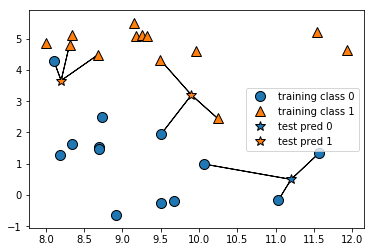

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### KNN is easy to understand and implement

It works well with smaller datasets, with fewer features
It does not work well with bigger datasets with 100s of features. **It becomes slow**


In [8]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

print (len(x_train) == len(y_train) and len(x_test) == len(y_test))

print(len(x_train)/len(cancer.data))


knn = KNeighborsClassifier()

knn.fit(x_train, y_train)


True
0.7486818980667839


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

By default train_test_split splits 75% of the data into test and 25% of the data into train

In [9]:
print ("Accuracy of KNN n-5 on the training set: {:.2f} %".format(knn.score(x_train,y_train)*100))

print ("Accuracy of KNN n-5 on the test set: {:.2f}%".format(knn.score(x_test,y_test)*100))


Accuracy of KNN n-5 on the training set: 94.60 %
Accuracy of KNN n-5 on the test set: 93.01%


#### Can we tune in the parameters of the KNN algo to predict more accurately?

No of neighbors: test usinga range of neighbors (1-10)

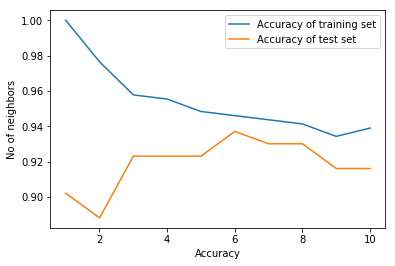

In [10]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

# lists for storing accuracies

training_accuracies = []
test_accuracies = []

neighbor_settings = range(1,11)

for n_neighbors in neighbor_settings:
    cif = KNeighborsClassifier(n_neighbors=n_neighbors)
    cif.fit(x_train, y_train)
    training_accuracies.append(cif.score(x_train, y_train))
    test_accuracies.append(cif.score(x_test, y_test))
    
    
# visualize the data

plt.plot(neighbor_settings, training_accuracies, label = "Accuracy of training set")
plt.plot(neighbor_settings, test_accuracies, label = "Accuracy of test set")
plt.xlabel("Accuracy")
plt.ylabel("No of neighbors")
plt.legend()


** Accuracy of test set is best (94%) while using 6 neighbors **


### Supervised Learning

There are 2 types of Supervised Learning:

**1. Classification (categorical data)**
    - Binary (tumor: bening, malignant)
    - Multiclass classification (books: physics, math, cs, history)
    - example algorithms: KNN, Linear Models, Decision Trees, SVMs etc.
**2. Regression (continuous data)**
    - predicting income, price of stock, age and other continuous data
    - example algorithms: KNN, Linear Models, Decision Trees, SVMs etc.

---

Linear Models like LinReg, LogReg, Lasso, Ridged etc. make predictions acc to a linear function of input features.

### Logistic Regression

In [11]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)

# code is almost same as KNN

log_reg_classifier = LogisticRegression()

log_reg_classifier.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_classifier.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_classifier.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 95.31 %
Accuracy of LogReg on the test set: 95.80 %


#### Can we optimize the LogRegClassifier to get better results?

Log Reg uses **Regularization** to avoid overfitting

Thare are 2 types of Regularization

- L1: assumes only a few features are important
- L2: does not assume that

L2 is the default one


Strength of Regularization: Parameter **'C'**

- lower C : causes our classifier to adjust to majority of data points
- higher C : emphasizes on correct classification of each data point

**By default the value of C is 1**


#### Higher C Value

In [13]:
log_reg_100 = LogisticRegression(C=100)

log_reg_100.fit(x_train, y_train)

print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_100.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_100.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 97.18 %
Accuracy of LogReg on the test set: 96.50 %


    There is an increase in both accuracies

    Also the gap bw the testing and training accuracies increase as well

    This means we are moving away from an underfit model
    
    Thus performance has been improved

In [14]:
log_reg_001 = LogisticRegression(C=0.01)

log_reg_001.fit(x_train, y_train)

print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_001.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_001.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 93.43 %
Accuracy of LogReg on the test set: 93.01 %


    Accuracy is lowered
    
    Gap is also less
    
    Performance is worse

### Linear Models (in general)

    y = wx + b
    
- w: slope or coeff, accessed via .coeff____ 
- b: offset or intercept, accessed via .intercept____
- w and b are learned params
- y is the prediction

#### For LogReg specifically:

    y = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0



w[0]: 0.393906  b: -0.031804


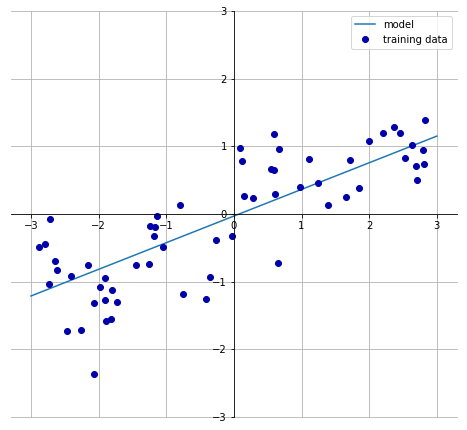

In [15]:
mglearn.plots.plot_linear_regression_wave()

#### In LogReg there is and addition of ```>0``` condition

We set a threshold value of predn

#### Let'sexplore the Learn Params for the diff C values we had


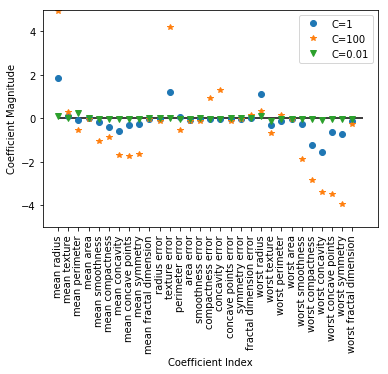

In [16]:
plt.plot(log_reg_classifier.coef_.T, 'o', label = 'C=1')
plt.plot(log_reg_100.coef_.T, '*', label = 'C=100')
plt.plot(log_reg_001.coef_.T, 'v', label = 'C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])

plt.ylim(-5,5)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

C=0.01: denotes stronger Regularization, It shifts coeff towards 0

C=100: focuses on correct classification

### Decision Trees

each node is decided on maximum information gain

![decision tree](https://camo.githubusercontent.com/1f868438e77459ed99da3c4b86b38300ef0ff8eb/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f662f66332f434152545f747265655f746974616e69635f7375727669766f72732e706e67)

Feature importances: [ 0.  1.]


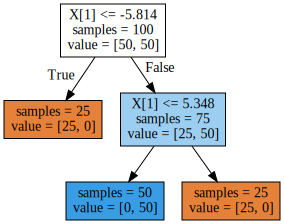

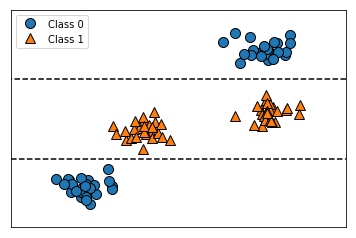

In [24]:
mglearn.plots.plot_tree_not_monotone()

In [21]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)

print ("Accuracy of DT on the training set: {:.2f} %".format(tree.score(x_train,y_train)*100))

print ("Accuracy of DT on the test set: {:.2f} %".format(tree.score(x_test,y_test)*100))

Accuracy of DT on the training set: 100.00 %
Accuracy of DT on the test set: 93.71 %


Accuracy of training subset is 100%

This is bcoz all the leaves are pure

The branching went all the way down until algorithm could memorize and fit all the labels

This is **Overfitting**

This happened because the DT was **unrestricted** and the branching went all the way down until it perfectly fit
the training data

We have to limit the depth of the DT, which in turn will limit its complexity

There is a technique called **Pruning** which prevents over-fitting

2 types of Pruning

1. Pre pruning: we stop the creation of the tree at an earlier stage. We dont let it develop completely.
    We can limit the max depth or max leaves or specify min number of points for a node so that it can keep splitting
2. Post pruning: we allow the tree to get built and then remove irrelevant nodes, nodes which contain little information


#### Pre Pruning with max_depth = 4

In [22]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

c

Accuracy of DT on the training set: 98.83 %
Accuracy of DT on the test set: 95.10 %


    This is better

    Accuracy on training subset is reduced, thus overfitting is reduced

    Accuracy on test is increased

In [23]:
!pip install graphviz

In [29]:
import graphviz

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'cancertree.dot', class_names = ['malignant', 'bening'], 
                feature_names = cancer.feature_names, impurity = False, filled = True)

#### Visualize the file:

![tree](cancertree.png)

This tells us how the predictions are made

Depth = 4

worst radius is at the root. So we can get an idea about the importance of this feature

Then we have branching into worst concave points and texture error

Each feature in a DT carries a certain weight

In [32]:
print ("Feature importances: {}".format(tree.feature_importances_))
type(tree.feature_importances_)

print(cancer.feature_names)

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


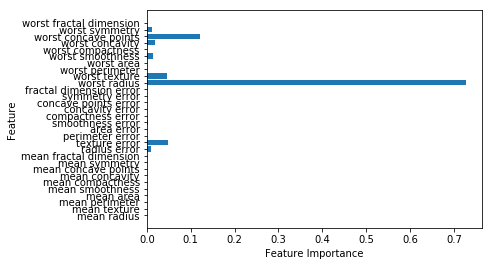

In [36]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

worst radius carries a lot of wt, so its at the root

then we have worst concave points, texture error

#### Advantages of DTs

- easy to view and understand
- unlike some other ML algos, there is no need to pre process, normalize, scale, or standardize the features

We dont have to bring features to same scale as in this algo the features are processed individually

#### Params to work with

- max_depth
- min_samples_leaf, max_samples_leaf
- max_leaf_nodes

#### Disadv

- tendency to overfit (even if pre pruned)
- poor generalization

#### Ensembles: combines multiple ML models into a more powerful model

### Random Forests

Ensembles of trees are preferred over a single DT Classifier

RF: collection of DTs

**How are RFs better than a single DT**

- a single DT is good for prediction, but is prone to overfit a part of data
- combining multiple DTs retains the predictive ability, and reduces overfitting by averaging the results
- RF applies **randomness** while building each DT. So each DT is diff
- averaging is done afterwards

In [37]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

random_forest_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

random_forest_classifier.fit(x_train, y_train)

print ("Accuracy of RF on the training set: {:.2f} %".format(random_forest_classifier.score(x_train,y_train)*100))

print ("Accuracy of RF on the test set: {:.2f} %".format(random_forest_classifier.score(x_test,y_test)*100))

Accuracy of RF on the training set: 100.00 %
Accuracy of RF on the test set: 97.20 %


There is a feature in RF called ```max_features```

This controls the randomness of each DT

or we can also apply pre pruning

There is a param ```feature_importances``` which helps us understand the wt each feature carries in the
decision making process

Since we are dealing with multiple DTs, randomness applies to each of them. So feature_importances in RF is
more representattive than in single DT

In the single DT we built earlier, the feature worst radius carried a significantly higher weight than the others

Lets see how it looks like for RF

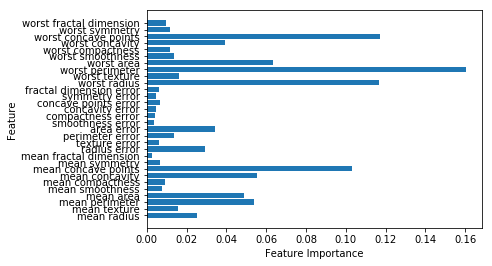

In [38]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), random_forest_classifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

    Now many of other features have a non-zero contribution, they play a heavier role in decision making
    
    Thus RF provides a more informed choice
    
#### Advantages of RF

- powerful and widely implemented, do not require much tuning of parameters
- dont require scaling of data
- make up for the deficiencies of DTs

#### Parameters to tune:

- n_jobs: number of cores to use (-1 for all cores)
- n_estimators: how many trees to use (more is always better). more trees tend to reduce overfitting of the algo
    But we also have to trade off bw training time and memory allocation of the algo
    Higher n_estimators drain more computer resources
- max_depth, for pr pruning
- max_features: determines randomness for each tree
    - default value: sqrt(n_features) for classification
    - default value: log2(n_features) for regression

#### Disadv

- not so good performance on high dimensional and sparse data(text data)
- need more time and memory for training process compared to othet models
- cannot be visualized as well as a single DT